# Packages

In [ ]:
install.packages('mlr')
library (mlr)
install.packages('psych')
library (psych)
install.packages('GPArotation')
library (GPArotation)
install.packages('FactoMineR')
library (FactoMineR)
install.packages('factoextra')
library (factoextra)
#install.packages('rpart.plot')
#library(rpart.plot)
#install.packages("e1071")
library(ggplot2)
#install.packages('neuralnet')
#library(neuralnet)
#install.packages('kernlab')
install.packages('quantmod')
library(quantmod)
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fastmatch’, ‘ParamHelpers’, ‘BBmisc’, ‘checkmate’, ‘parallelMap’, ‘XML’


Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDe

# Data Preparation

## Loading data from yahoo finance

In [ ]:
Brent <- getSymbols(Symbols='BRNT.L',src='yahoo',from = "2017-03-14",to="2022-07-07",auto.assign = FALSE)
head(Brent)
dim(Brent)

           BRNT.L.Open BRNT.L.High BRNT.L.Low BRNT.L.Close BRNT.L.Volume
2017-03-14        21.6        21.6       21.1         21.2          5156
2017-03-15        21.6        21.7       21.6         21.6         10657
2017-03-16        21.9        22.0       21.7         21.6         11235
2017-03-17        21.6        21.8       21.6         21.7          1482
2017-03-20        21.5        21.6       21.5         21.7           784
2017-03-21        21.6        21.8       21.5         21.4           410
           BRNT.L.Adjusted
2017-03-14            21.2
2017-03-15            21.6
2017-03-16            21.6
2017-03-17            21.7
2017-03-20            21.7
2017-03-21            21.4

[1] 1342    6

In [ ]:
Crude <- getSymbols(Symbols='CRUD.L',src='yahoo',from = "2017-03-14",to="2022-07-07",auto.assign = FALSE)
head(Crude)
dim(Crude)

           CRUD.L.Open CRUD.L.High CRUD.L.Low CRUD.L.Close CRUD.L.Volume
2017-03-14        7.30        7.34       7.11         7.14        896871
2017-03-15        7.32        7.35       7.27         7.31       9897780
2017-03-16        7.44        7.44       7.30         7.30       1545769
2017-03-17        7.32        7.39       7.32         7.33        112914
2017-03-20        7.28        7.33       7.22         7.31        247553
2017-03-21        7.34        7.35       7.15         7.19        282137
           CRUD.L.Adjusted
2017-03-14            7.14
2017-03-15            7.31
2017-03-16            7.30
2017-03-17            7.33
2017-03-20            7.31
2017-03-21            7.19

[1] 1342    6

In [ ]:
Gold <- getSymbols(Symbols='GOLD',src='yahoo',from = "2017-03-14",to="2022-07-07",auto.assign = FALSE)
head(Gold)
dim(Gold)

           GOLD.Open GOLD.High GOLD.Low GOLD.Close GOLD.Volume GOLD.Adjusted
2017-03-14     18.23     18.50    17.72      17.80    12902400      16.00185
2017-03-15     17.95     19.07    17.70      19.02    23309000      17.09861
2017-03-16     19.44     19.50    18.86      18.91    15767000      16.99972
2017-03-17     19.03     19.24    18.75      18.85    15091500      16.94578
2017-03-20     18.93     19.11    18.82      19.06     7937600      17.13456
2017-03-21     19.11     19.59    19.09      19.45    14114400      17.48517

[1] 1338    6

### Not all dates are the same

In [ ]:
i1=index(Gold)
i2=index(Brent)
i1==i2

Warning message in `==.default`(i1, i2):
“longer object length is not a multiple of shorter object length”


[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
 [181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
 [217]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [229]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [289]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [337]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [349]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [361]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
 [373]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [397]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [409]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [421]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [ ]:
total <- merge(Brent,Crude,Gold)
Data = data.frame(total)
head(Data)
dim(Data)

,BRNT.L.Open,BRNT.L.High,BRNT.L.Low,BRNT.L.Close,BRNT.L.Volume,BRNT.L.Adjusted,CRUD.L.Open,CRUD.L.High,CRUD.L.Low,CRUD.L.Close,CRUD.L.Volume,CRUD.L.Adjusted,GOLD.Open,GOLD.High,GOLD.Low,GOLD.Close,GOLD.Volume,GOLD.Adjusted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-03-14,21.6,21.6,21.1,21.2,5156,21.2,7.30,7.34,7.11,7.14,896871,7.14,18.23,18.50,17.72,17.80,12902400,16.00185
2017-03-15,21.6,21.7,21.6,21.6,10657,21.6,7.32,7.35,7.27,7.31,9897780,7.31,17.95,19.07,17.70,19.02,23309000,17.09861
2017-03-16,21.9,22.0,21.7,21.6,11235,21.6,7.44,7.44,7.30,7.30,1545769,7.30,19.44,19.50,18.86,18.91,15767000,16.99972
2017-03-17,21.6,21.8,21.6,21.7,1482,21.7,7.32,7.39,7.32,7.33,112914,7.33,19.03,19.24,18.75,18.85,15091500,16.94578
2017-03-20,21.5,21.6,21.5,21.7,784,21.7,7.28,7.33,7.22,7.31,247553,7.31,18.93,19.11,18.82,19.06,7937600,17.13456
2017-03-21,21.6,21.8,21.5,21.4,410,21.4,7.34,7.35,7.15,7.19,282137,7.19,19.11,19.59,19.09,19.45,14114400,17.48517


[1] 1368   18

## Handling Missing Data

Impute Missing Values using last and next day's average

In [ ]:
counter=0
for (i in 1:ncol(Data)) {
  for (j in 1:nrow(Data)) {
    if (is.na(Data[j,i])==TRUE) {
      Data[j,i] = (Data[j-1,i]+Data[j+1,i])/2
      counter = counter +1
    }
  }
}
print(counter)

[1] 492


Ελέγχουμε ποιές μέρες είναι ακόμη κενές

In [ ]:
counter=0
for (i in 1:ncol(Data)) {
  for (j in 1:nrow(Data)) {
    if (is.na(Data[j,i])==TRUE) {
      cat("row ",j,"col  ",i,"\n")
      counter = counter +1
    }
  }
}
print(counter)

row  1232 col   1 
row  1233 col   1 
row  1344 col   1 
row  1345 col   1 
row  1232 col   2 
row  1233 col   2 
row  1344 col   2 
row  1345 col   2 
row  1232 col   3 
row  1233 col   3 
row  1344 col   3 
row  1345 col   3 
row  1232 col   4 
row  1233 col   4 
row  1344 col   4 
row  1345 col   4 
row  1232 col   5 
row  1233 col   5 
row  1344 col   5 
row  1345 col   5 
row  1232 col   6 
row  1233 col   6 
row  1344 col   6 
row  1345 col   6 
row  1232 col   7 
row  1233 col   7 
row  1344 col   7 
row  1345 col   7 
row  1232 col   8 
row  1233 col   8 
row  1344 col   8 
row  1345 col   8 
row  1232 col   9 
row  1233 col   9 
row  1344 col   9 
row  1345 col   9 
row  1232 col   10 
row  1233 col   10 
row  1344 col   10 
row  1345 col   10 
row  1232 col   11 
row  1233 col   11 
row  1344 col   11 
row  1345 col   11 
row  1232 col   12 
row  1233 col   12 
row  1344 col   12 
row  1345 col   12 
[1] 48


In [ ]:
Data <- na.exclude(Data)
dim(Data)
Data_train <- Data

[1] 1364   18

## Factor Analysis

In [ ]:
dim(Data_train)

[1] 1364   18

Factor analysis before kmeans

Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”
Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”
In factor.scores, the correlation matrix is singular, the pseudo inverse is  used

I was unable to calculate the factor score weights, factor loadings used instead



Parallel analysis suggests that the number of factors =  3  and the number of components =  3 


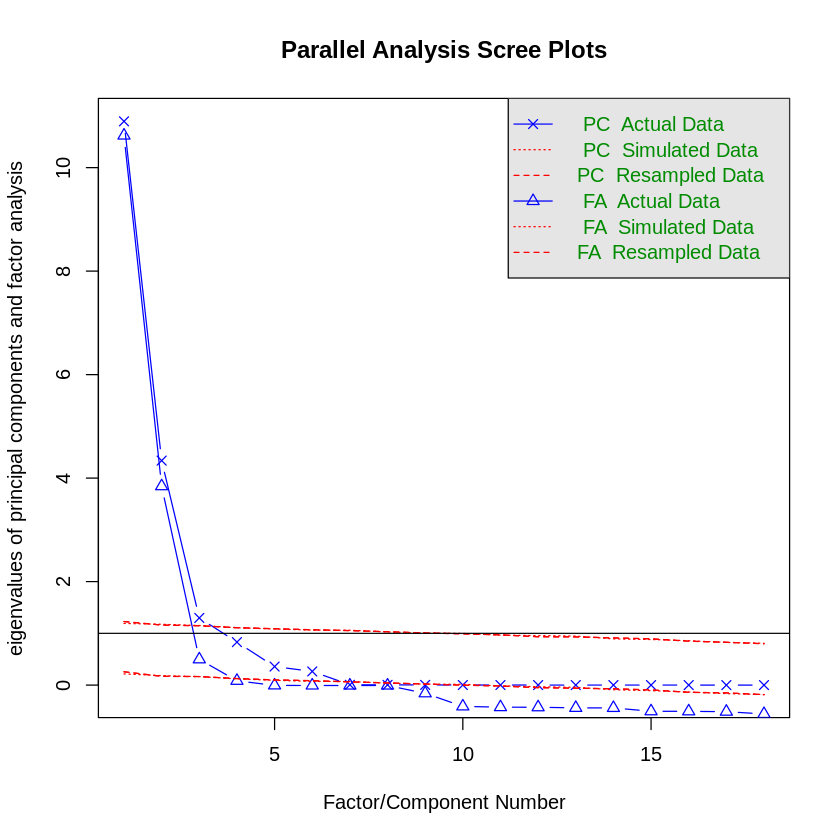

In [ ]:
fa.parallel(Data_train, n.iter = 1,sim=TRUE,cor="mixed")

Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”
Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”
In factor.scores, the correlation matrix is singular, the pseudo inverse is  used

I was unable to calculate the factor score weights, factor loadings used instead



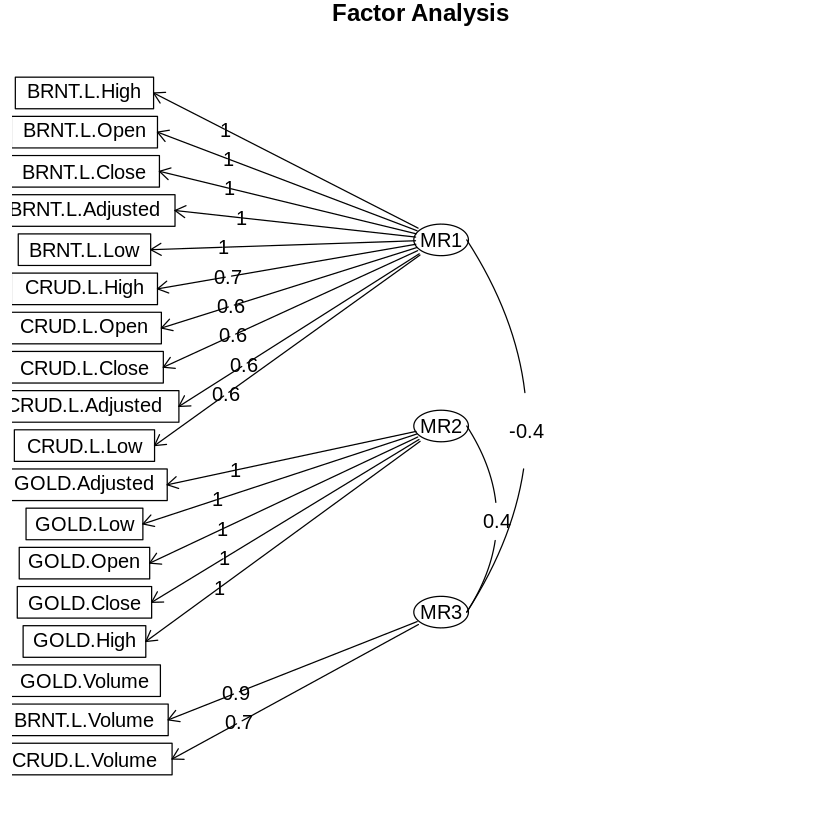

In [ ]:
myFA = fa(Data_train, nfactors = 3)
fa.diagram(myFA)

## Transforming to categorical

In [ ]:
# n= number of clusters (3 or 5 or 7) i= 2,3,4 antistoixa
n=7
a=4

In [ ]:
clusters_centers_all <- matrix(nrow=ncol(Data_train),ncol=n)
#print(clusters_centers_all)

In [ ]:
names = colnames(Data_train)
names

[1] "BRNT.L.Open"     "BRNT.L.High"     "BRNT.L.Low"      "BRNT.L.Close"   
 [5] "BRNT.L.Volume"   "BRNT.L.Adjusted" "CRUD.L.Open"     "CRUD.L.High"    
 [9] "CRUD.L.Low"      "CRUD.L.Close"    "CRUD.L.Volume"   "CRUD.L.Adjusted"
[13] "GOLD.Open"       "GOLD.High"       "GOLD.Low"        "GOLD.Close"     
[17] "GOLD.Volume"     "GOLD.Adjusted"

In [ ]:
#is.na(Data_train)

In [ ]:
 # Compute k-means with n
set.seed(123)
for(i in 1:ncol(Data_train)) {
  clust = kmeans(Data_train[, as.character(names[i])], n, nstart = 25)
  Data_train[,as.character(names[i])]= NULL
  clusters_centers_all[i,]= clust$centers
  Data_train<- cbind(Data_train,  clust$cluster - a)
  # Change cluster for IRT
  #wine_train$fixed.acidity <- wine_train$fixed.acidity - i
}

In [ ]:
colnames(Data_train) <- names
head(Data_train)

,BRNT.L.Open,BRNT.L.High,BRNT.L.Low,BRNT.L.Close,BRNT.L.Volume,BRNT.L.Adjusted,CRUD.L.Open,CRUD.L.High,CRUD.L.Low,CRUD.L.Close,CRUD.L.Volume,CRUD.L.Adjusted,GOLD.Open,GOLD.High,GOLD.Low,GOLD.Close,GOLD.Volume,GOLD.Adjusted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-03-14,0,-1,2,-3,-3,-2,0,-1,-2,-1,-2,-2,3,1,-3,1,-1,0
2017-03-15,0,-1,2,-3,-3,-2,0,-1,-2,-1,1,-2,3,1,-3,1,-3,-2
2017-03-16,0,-1,2,-3,-3,-2,0,-1,-2,-1,-2,-2,3,1,-3,1,2,-2
2017-03-17,0,-1,2,-3,-3,-2,0,-1,-2,-1,-1,-2,3,1,-3,1,2,-2
2017-03-20,0,-1,2,-3,-3,-2,0,-1,-2,-1,-1,-2,3,1,-3,1,1,-2
2017-03-21,0,-1,2,-3,-3,-2,0,-1,-2,-1,-1,-2,3,1,-3,1,2,-2


## FA2

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”


Parallel analysis suggests that the number of factors =  8  and the number of components =  6 


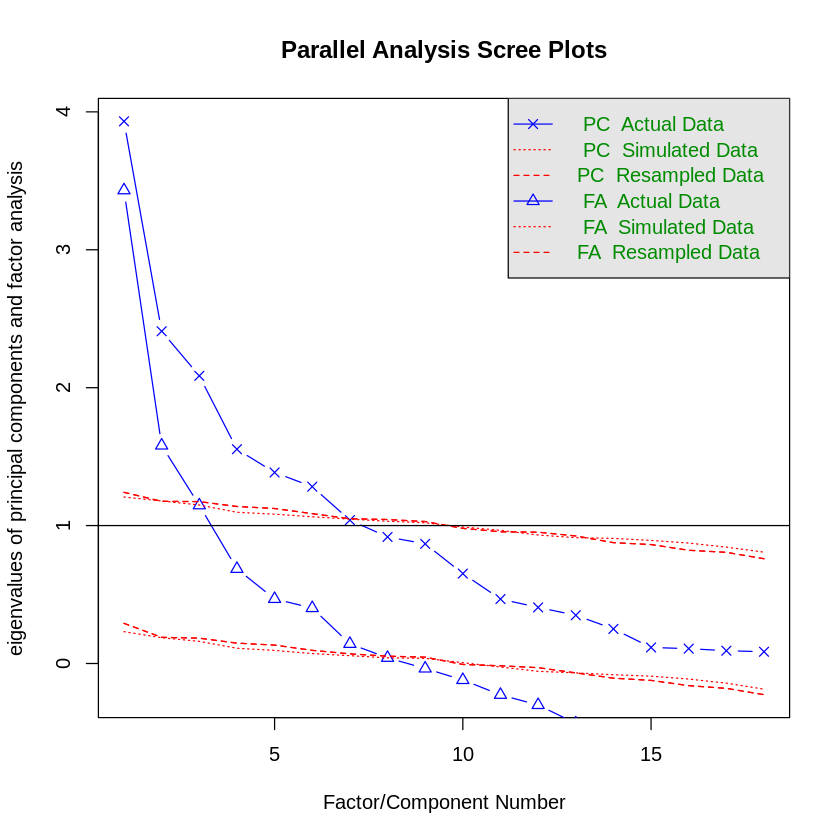

In [ ]:
fa.parallel(Data_train, n.iter = 1,sim=TRUE,cor="mixed")

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“An ultra-Heywood case was detected.  Examine the results carefully”


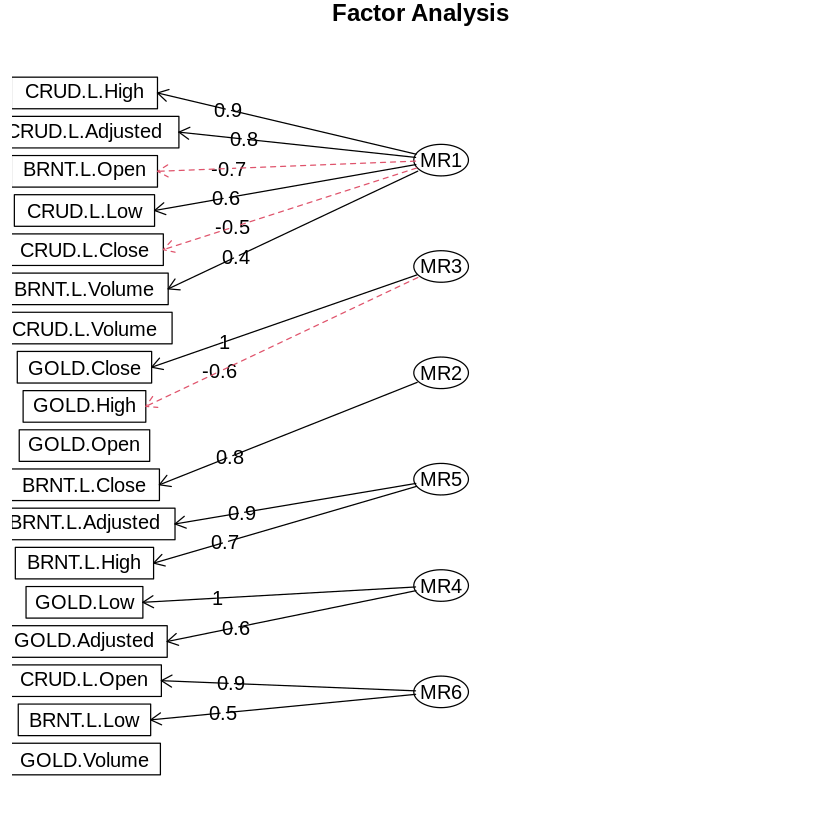

In [ ]:
myFA2 = fa(Data_train, nfactors = 6)
fa.diagram(myFA2)

# IRT

In [ ]:
colnames(Data_train)

[1] "BRNT.L.Open"     "BRNT.L.High"     "BRNT.L.Low"      "BRNT.L.Close"   
 [5] "BRNT.L.Volume"   "BRNT.L.Adjusted" "CRUD.L.Open"     "CRUD.L.High"    
 [9] "CRUD.L.Low"      "CRUD.L.Close"    "CRUD.L.Volume"   "CRUD.L.Adjusted"
[13] "GOLD.Open"       "GOLD.High"       "GOLD.Low"        "GOLD.Close"     
[17] "GOLD.Volume"     "GOLD.Adjusted"

In [ ]:
Importance=Data_train

In [ ]:
mr1 <- c('BRNT.L.Open','BRNT.L.Volume',
         'CRUD.L.High','CRUD.L.Low','CRUD.L.Close','CRUD.L.Adjusted')
mr2 <- c('GOLD.High','GOLD.Close')
mr3 <- c('BRNT.L.Adjusted','BRNT.L.High')
mr4 <- c('GOLD.Low','GOLD.Adjusted')
mr5 <- c('CRUD.L.Open','BRNT.L.Low')

## First Factor

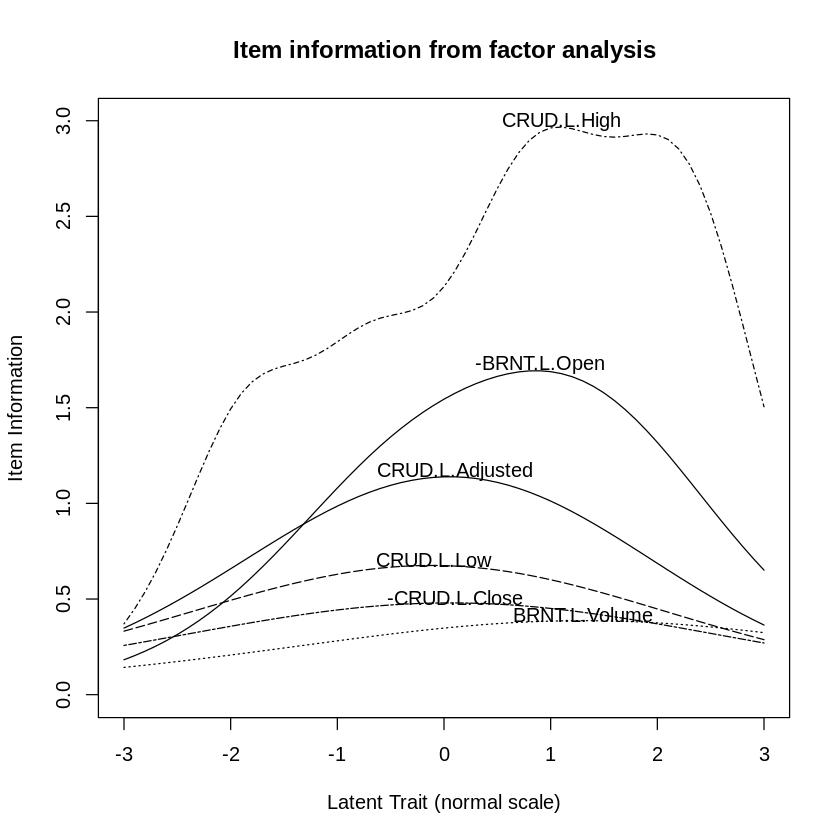

In [ ]:
Importance.F1.data = Importance[, mr1]
Importance.F1.irt = irt.fa(Importance.F1.data)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



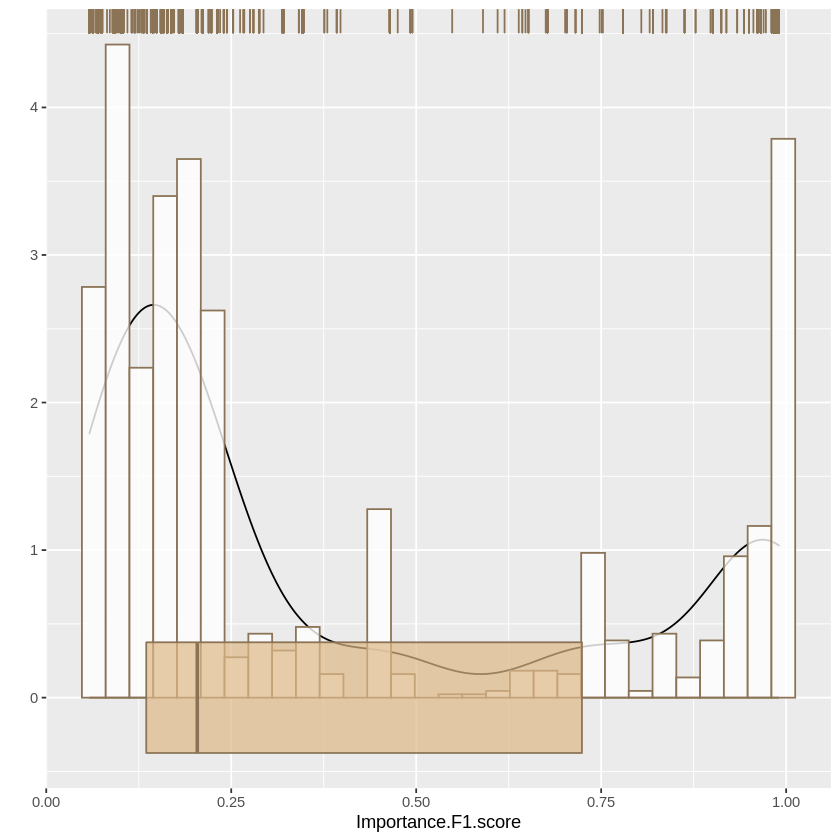

In [ ]:
scores = scoreIrt(Importance.F1.irt, items=Importance.F1.data)
### rescale score
scores.sc = scores$theta1
Importance.F1.score = pnorm(scores.sc)
Importance = data.frame(Importance, Importance.F1.score)
qplot(Importance.F1.score, data = Importance, geom = "density") +
  geom_histogram(aes(y = ..density..), colour = "burlywood4", fill = "white", alpha=0.8) +
  geom_boxplot(colour = "burlywood4", fill="burlywood", alpha = 0.7) +
  geom_rug(sides = "t", colour = "burlywood4")

In [ ]:
Importance[, mr1] = NULL
head(Importance)

,BRNT.L.High,BRNT.L.Low,BRNT.L.Close,BRNT.L.Adjusted,CRUD.L.Open,CRUD.L.Volume,GOLD.Open,GOLD.High,GOLD.Low,GOLD.Close,GOLD.Volume,GOLD.Adjusted,Importance.F1.score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-03-14,-1,2,-3,-2,0,-2,3,1,-3,1,-1,0,0.2312048
2017-03-15,-1,2,-3,-2,0,1,3,1,-3,1,-3,-2,0.2312048
2017-03-16,-1,2,-3,-2,0,-2,3,1,-3,1,2,-2,0.2312048
2017-03-17,-1,2,-3,-2,0,-1,3,1,-3,1,2,-2,0.2312048
2017-03-20,-1,2,-3,-2,0,-1,3,1,-3,1,1,-2,0.2312048
2017-03-21,-1,2,-3,-2,0,-1,3,1,-3,1,2,-2,0.2312048


## Second Factor

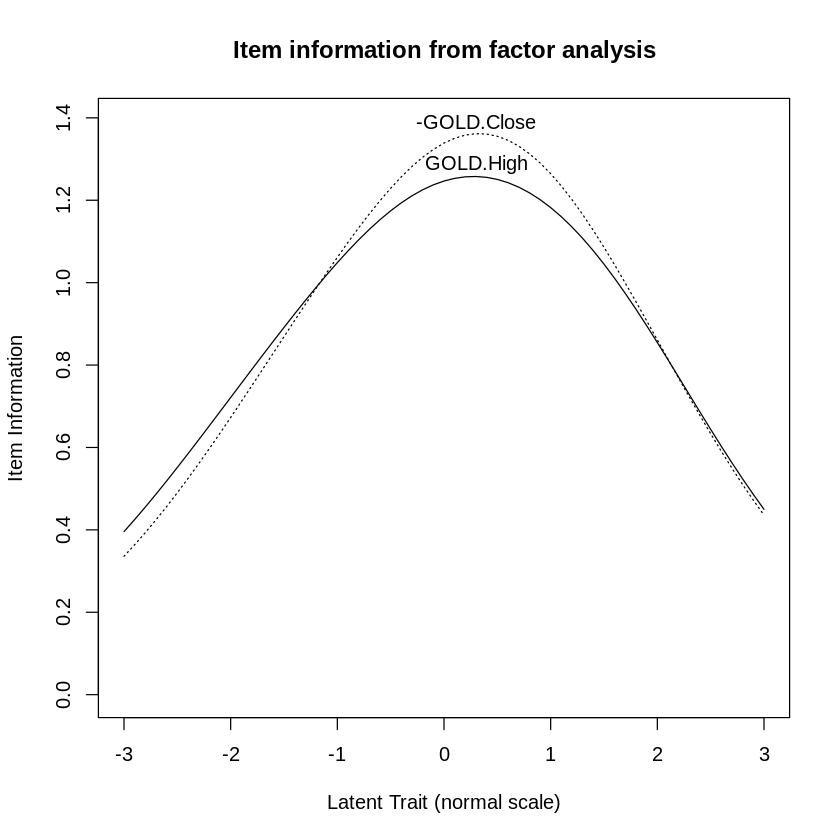

In [ ]:
Importance.F2.data = Importance[, mr2]
Importance.F2.irt = irt.fa(Importance.F2.data)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



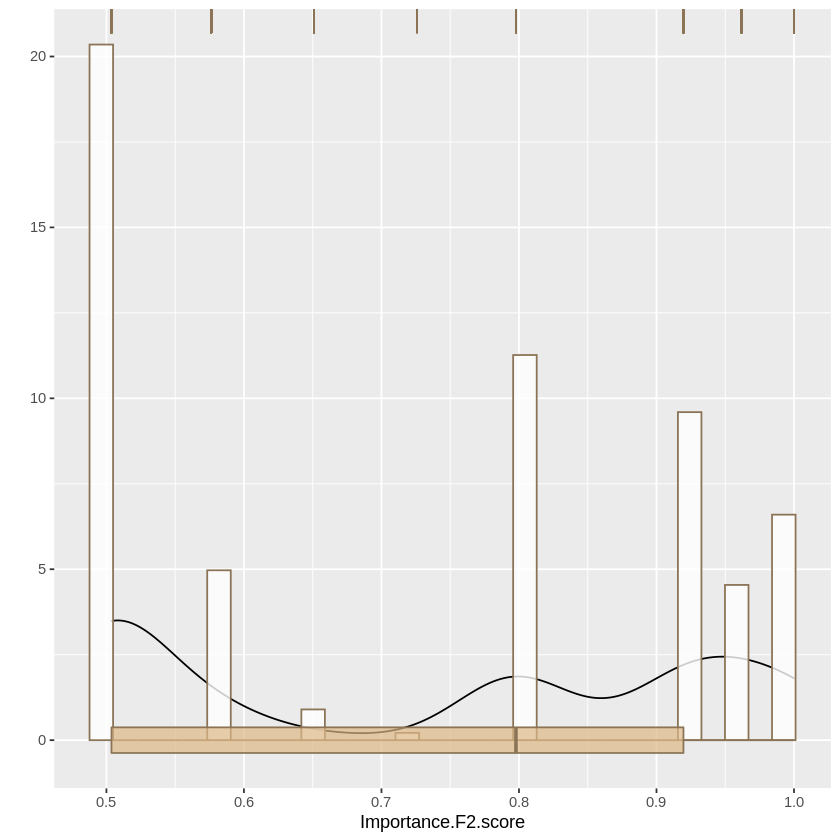

In [ ]:
scores = scoreIrt(Importance.F2.irt, items=Importance.F2.data)
### rescale score
scores.sc = scores$theta1
Importance.F2.score = pnorm(scores.sc)
Importance = data.frame(Importance, Importance.F2.score)
qplot(Importance.F2.score, data = Importance, geom = "density") +
  geom_histogram(aes(y = ..density..), colour = "burlywood4", fill = "white", alpha=0.8) +
  geom_boxplot(colour = "burlywood4", fill="burlywood", alpha = 0.7) +
  geom_rug(sides = "t", colour = "burlywood4")

In [ ]:
Importance[, mr2] = NULL
head(Importance)

,BRNT.L.High,BRNT.L.Low,BRNT.L.Close,BRNT.L.Adjusted,CRUD.L.Open,CRUD.L.Volume,GOLD.Open,GOLD.Low,GOLD.Volume,GOLD.Adjusted,Importance.F1.score,Importance.F2.score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-03-14,-1,2,-3,-2,0,-2,3,-3,-1,0,0.2312048,0.7978072
2017-03-15,-1,2,-3,-2,0,1,3,-3,-3,-2,0.2312048,0.7978072
2017-03-16,-1,2,-3,-2,0,-2,3,-3,2,-2,0.2312048,0.7978072
2017-03-17,-1,2,-3,-2,0,-1,3,-3,2,-2,0.2312048,0.7978072
2017-03-20,-1,2,-3,-2,0,-1,3,-3,1,-2,0.2312048,0.7978072
2017-03-21,-1,2,-3,-2,0,-1,3,-3,2,-2,0.2312048,0.7978072


## Third Factor

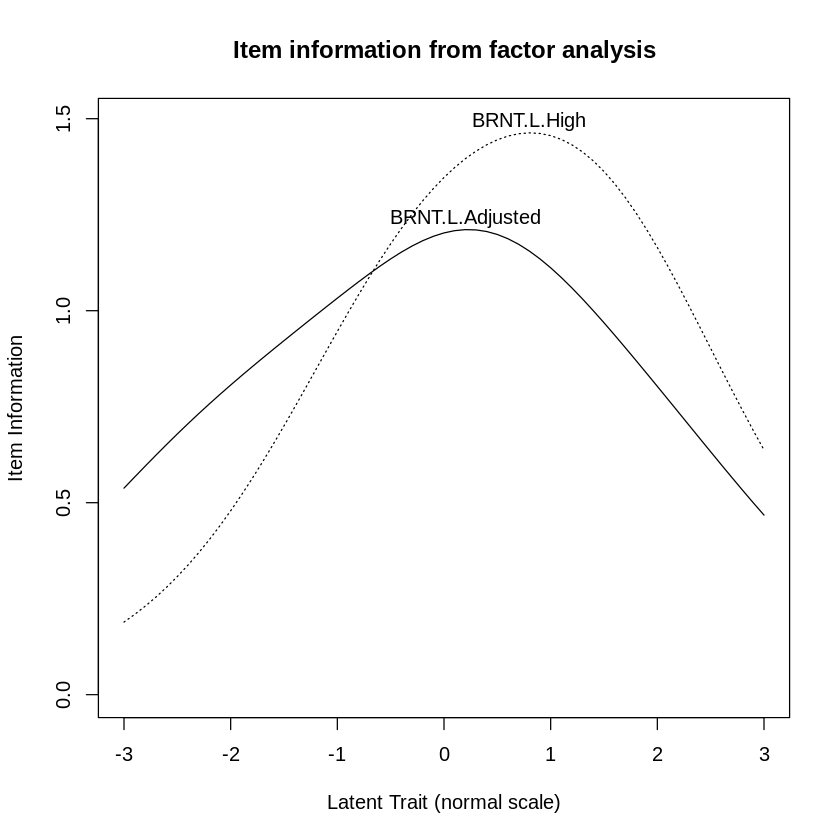

In [ ]:
Importance.F3.data = Importance[,mr3]
Importance.F3.irt = irt.fa(Importance.F3.data)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



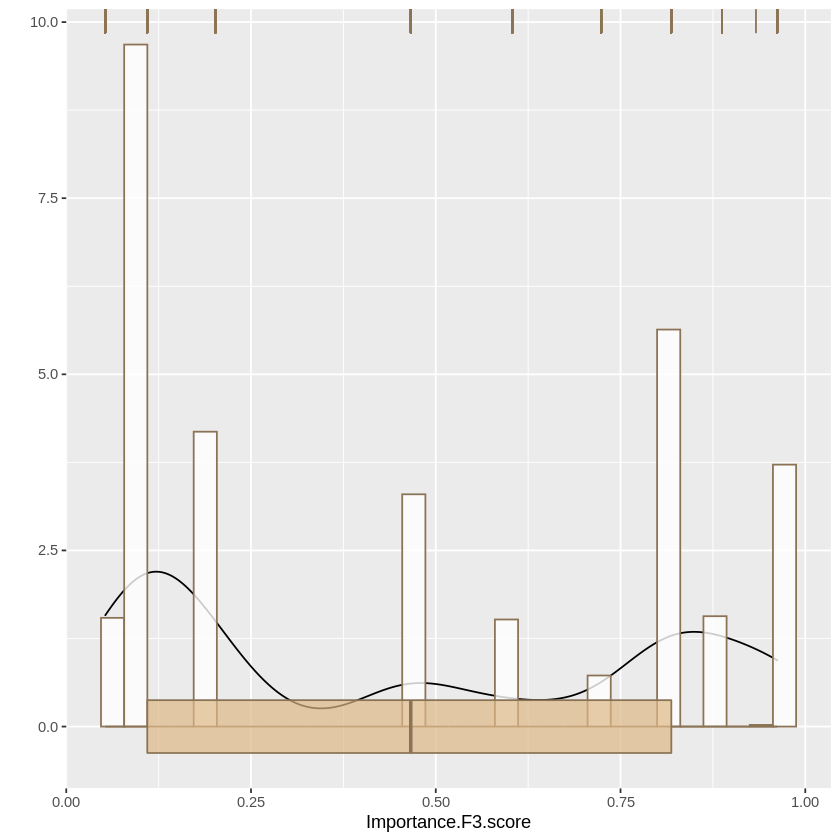

In [ ]:
scores = scoreIrt(Importance.F3.irt, items=Importance.F3.data)
### rescale score
scores.sc = scores$theta1
Importance.F3.score = pnorm(scores.sc)
Importance = data.frame(Importance, Importance.F3.score)
qplot(Importance.F3.score, data = Importance, geom = "density") +
  geom_histogram(aes(y = ..density..), colour = "burlywood4", fill = "white", alpha=0.8) +
  geom_boxplot(colour = "burlywood4", fill="burlywood", alpha = 0.7) +
  geom_rug(sides = "t", colour = "burlywood4")

In [ ]:
Importance[,mr3] = NULL
head(Importance)

,BRNT.L.Low,BRNT.L.Close,CRUD.L.Open,CRUD.L.Volume,GOLD.Open,GOLD.Low,GOLD.Volume,GOLD.Adjusted,Importance.F1.score,Importance.F2.score,Importance.F3.score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-03-14,2,-3,0,-2,3,-3,-1,0,0.2312048,0.7978072,0.2019686
2017-03-15,2,-3,0,1,3,-3,-3,-2,0.2312048,0.7978072,0.2019686
2017-03-16,2,-3,0,-2,3,-3,2,-2,0.2312048,0.7978072,0.2019686
2017-03-17,2,-3,0,-1,3,-3,2,-2,0.2312048,0.7978072,0.2019686
2017-03-20,2,-3,0,-1,3,-3,1,-2,0.2312048,0.7978072,0.2019686
2017-03-21,2,-3,0,-1,3,-3,2,-2,0.2312048,0.7978072,0.2019686


## Fourth Factor

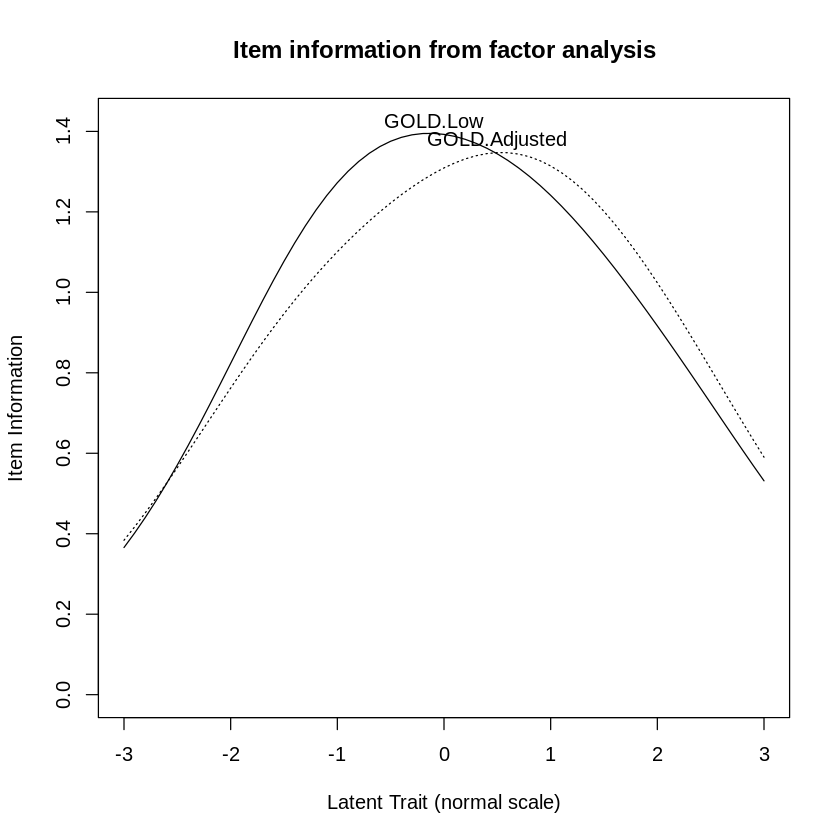

In [ ]:
Importance.F4.data = Importance[,mr4]
Importance.F4.irt = irt.fa(Importance.F4.data)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



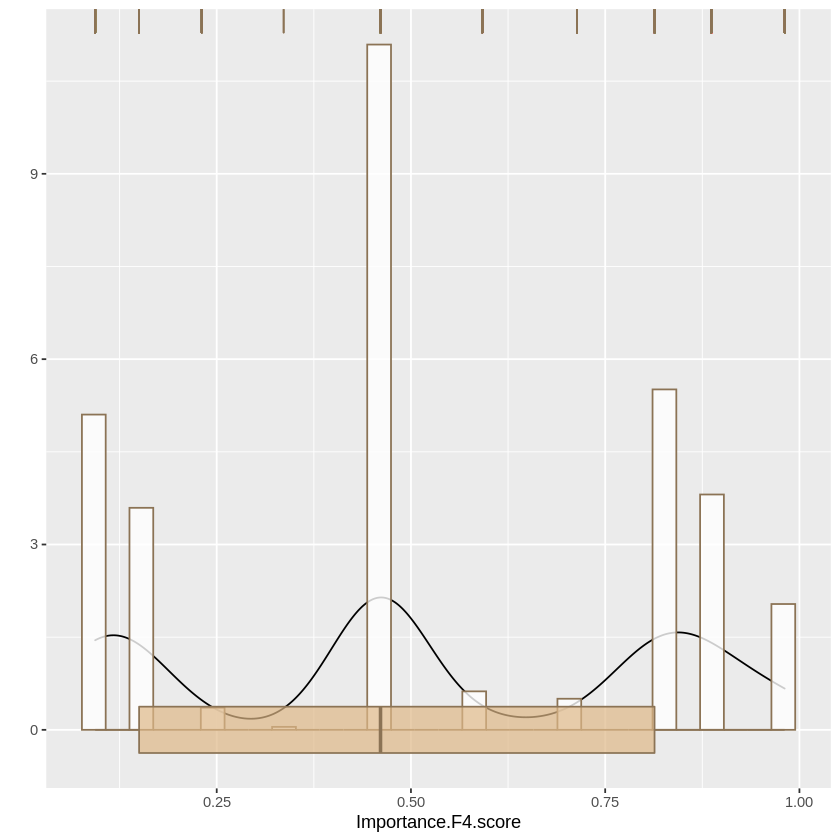

In [ ]:
scores = scoreIrt(Importance.F4.irt, items=Importance.F4.data)
### rescale score
scores.sc = scores$theta1
Importance.F4.score = pnorm(scores.sc)
Importance = data.frame(Importance, Importance.F4.score)
qplot(Importance.F4.score, data = Importance, geom = "density") +
  geom_histogram(aes(y = ..density..), colour = "burlywood4", fill = "white", alpha=0.8) +
  geom_boxplot(colour = "burlywood4", fill="burlywood", alpha = 0.7) +
  geom_rug(sides = "t", colour = "burlywood4")

In [ ]:
Importance[,mr4] = NULL
head(Importance)

,BRNT.L.Low,BRNT.L.Close,CRUD.L.Open,CRUD.L.Volume,GOLD.Open,GOLD.Volume,Importance.F1.score,Importance.F2.score,Importance.F3.score,Importance.F4.score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-03-14,2,-3,0,-2,3,-1,0.2312048,0.7978072,0.2019686,0.23066927
2017-03-15,2,-3,0,1,3,-3,0.2312048,0.7978072,0.2019686,0.09355222
2017-03-16,2,-3,0,-2,3,2,0.2312048,0.7978072,0.2019686,0.09355222
2017-03-17,2,-3,0,-1,3,2,0.2312048,0.7978072,0.2019686,0.09355222
2017-03-20,2,-3,0,-1,3,1,0.2312048,0.7978072,0.2019686,0.09355222
2017-03-21,2,-3,0,-1,3,2,0.2312048,0.7978072,0.2019686,0.09355222


## Fifth Factor

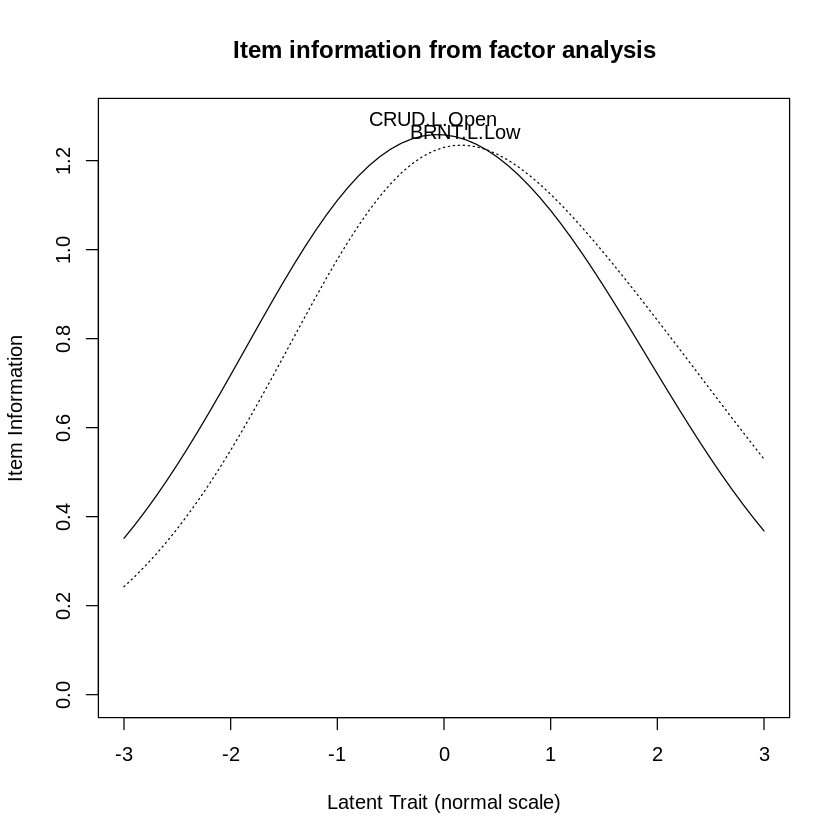

In [ ]:
Importance.F5.data = Importance[,mr5]
Importance.F5.irt = irt.fa(Importance.F5.data)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



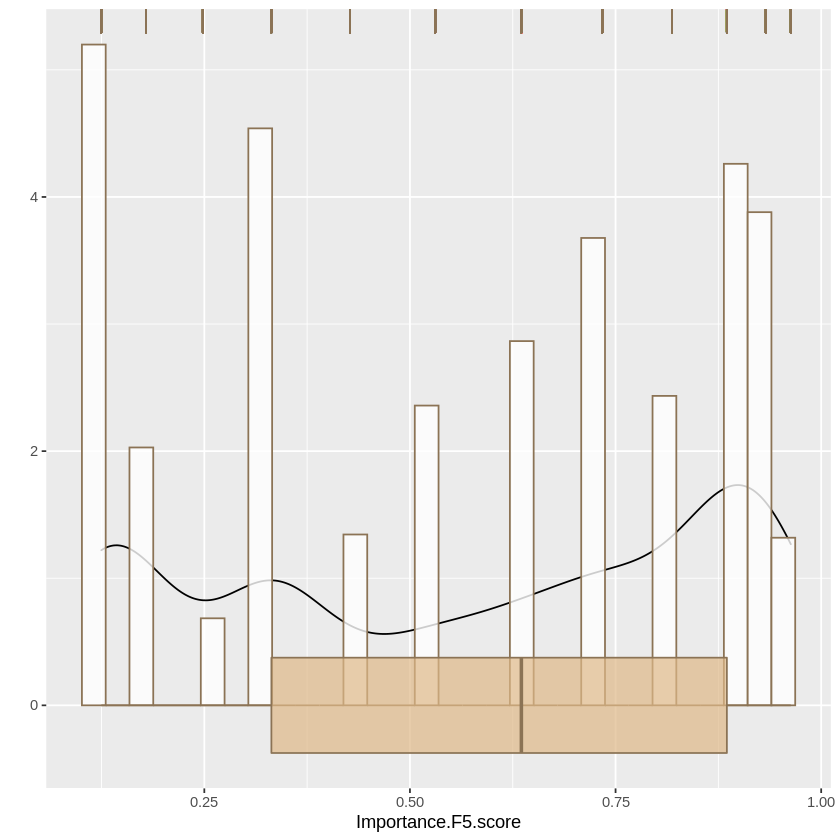

In [ ]:
scores = scoreIrt(Importance.F5.irt, items=Importance.F5.data)
### rescale score
scores.sc = scores$theta1
Importance.F5.score = pnorm(scores.sc)
Importance = data.frame(Importance, Importance.F5.score)
qplot(Importance.F5.score, data = Importance, geom = "density") +
  geom_histogram(aes(y = ..density..), colour = "burlywood4", fill = "white", alpha=0.8) +
  geom_boxplot(colour = "burlywood4", fill="burlywood", alpha = 0.7) +
  geom_rug(sides = "t", colour = "burlywood4")

In [ ]:
Importance[,mr5] = NULL
head(Importance)

,BRNT.L.Close,CRUD.L.Volume,GOLD.Open,GOLD.Volume,Importance.F1.score,Importance.F2.score,Importance.F3.score,Importance.F4.score,Importance.F5.score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-03-14,-3,-2,3,-1,0.2312048,0.7978072,0.2019686,0.23066927,0.8187349
2017-03-15,-3,1,3,-3,0.2312048,0.7978072,0.2019686,0.09355222,0.8187349
2017-03-16,-3,-2,3,2,0.2312048,0.7978072,0.2019686,0.09355222,0.8187349
2017-03-17,-3,-1,3,2,0.2312048,0.7978072,0.2019686,0.09355222,0.8187349
2017-03-20,-3,-1,3,1,0.2312048,0.7978072,0.2019686,0.09355222,0.8187349
2017-03-21,-3,-1,3,2,0.2312048,0.7978072,0.2019686,0.09355222,0.8187349


# Unleaded Greece

In [ ]:
unleaded_raw = read.csv('https://raw.githubusercontent.com/iMEdD-Lab/open-data/master/FUEL_PRICES/fuel_average_prices_Greece.csv')
head(unleaded_raw)
dim(unleaded_raw)

,date,diesel_driving,diesel_home_heating,super,unleaded_100,unleaded_95,autogas
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017-03-14,1.292,0.984,1.646,1.727,1.533,0.859
2,2017-03-15,1.290,0.981,1.646,1.726,1.530,0.858
3,2017-03-16,1.288,0.979,1.647,1.723,1.527,0.857
4,2017-03-17,1.286,0.977,1.650,1.716,1.525,0.857
5,2017-03-18,1.286,0.977,1.650,1.716,1.525,0.857
6,2017-03-19,1.284,0.975,1.651,1.716,1.522,0.856


[1] 1945    7

In [ ]:
#The Dates from the Data set
indexes = index(total)
#Removing missing Dates
indexes <- indexes[-1345]
indexes <- indexes[-1344]
indexes <- indexes[-1233]
indexes <- indexes[-1232]
indexes = data.frame(indexes)
#Extra dummy index for the loop to work
indexes[nrow(indexes) + 1,] = '2999-10-10'
head(indexes)
dim(indexes)

,indexes
,<date>
1,2017-03-14
2,2017-03-15
3,2017-03-16
4,2017-03-17
5,2017-03-20
6,2017-03-21


[1] 1365    1

In [ ]:
#Creating a dummy to pass the values of unleaded matching the dates from the Dataset
dummy = data.frame(Data[,'BRNT.L.Open'])
#head(dummy)
dim(dummy)

[1] 1364    1

In [ ]:
as.character(unleaded_raw[1,1])
as.character(indexes[1,1])
as.character(unleaded_raw[1,1]) == as.character(indexes[1,1])

[1] "2017-03-14"

[1] "2017-03-14"

[1] TRUE

In [ ]:
j=1
counter2=0
for (i in 1:nrow(unleaded_raw)) {
  if (as.character(unleaded_raw[i,1])==as.character(indexes[j,1])) {
    dummy[j,1]=unleaded_raw[i,5]
    counter2 = counter2+1
    j=j+1
  }
}
head(dummy)
dim(dummy)

,Data....BRNT.L.Open..
,<dbl>
1,1.727
2,1.726
3,1.723
4,1.716
5,1.721
6,1.720


[1] 1364    1

In [ ]:
#Timeseries needs matrix
unleaded_time = as.matrix(dummy)
dim(unleaded_time)
Data_time = Importance
dim(Data_time)

[1] 1364    1

[1] 1364    9

### Adding the Date index

In [ ]:
colnames(Data_time)

[1] "BRNT.L.Close"        "CRUD.L.Volume"       "GOLD.Open"          
[4] "GOLD.Volume"         "Importance.F1.score" "Importance.F2.score"
[7] "Importance.F3.score" "Importance.F4.score" "Importance.F5.score"

In [ ]:
d1 = data.frame(Importance)
d1$unleaded <- unleaded_time
#head(d1)
d1[,'BRNT.L.Close']=NULL
d1[,'CRUD.L.Volume']=NULL
d1[,'GOLD.Open']=NULL
d1[,'GOLD.Volume']=NULL
d1[,'Importance.F1.score']=NULL
d1[,'Importance.F2.score']=NULL
d1[,'Importance.F3.score']=NULL
d1[,'Importance.F4.score']=NULL
d1[,'Importance.F5.score']=NULL
unleaded_time <- as.matrix(d1)
head(unleaded_time)

,unleaded
2017-03-14,1.727
2017-03-15,1.726
2017-03-16,1.723
2017-03-17,1.716
2017-03-20,1.721
2017-03-21,1.720


## Train Test Split

In [ ]:
Data_time= as.matrix(Importance)
#head(Data_time)
dim(Data_time)
dim(unleaded_time)

[1] 1364    9

[1] 1364    1

Αν χρησιμοποιήσουμε όλα τα δεδομένα απο το 2017 το μοντέλο χωρίς την ΙRT είναι οριακά καλύτερο λόγο του μεγέθους των δεδομένων της βενζίνης. \\
Αλλά με λιγότερα δεδομένα υπάρχει μεγάλη βελτίωση

In [ ]:
# Starting point for train
a=1000
#Ending point train / before test
b=1334 #Predict one month at 1334
#Train Test Split
Data_time_train = Data_time[a:b,]
Data_time_test = Data_time[((b+1):nrow(Data_time)),]
unleaded_time_train <- unleaded_time[a:b,]
unleaded_time_test <- unleaded_time[((b+1):nrow(unleaded_time)),]
dim(Data_time_train)
dim(Data_time_test)
nrow(unleaded_time_train)
nrow(unleaded_time_test)

[1] 335   9

[1] 30  9

NULL

NULL

### Fixing the index again

In [ ]:
d1 = data.frame(Data_time_train)
d1$unleaded <- unleaded_time_train
#head(d1)
d1[,'BRNT.L.Close']=NULL
d1[,'CRUD.L.Volume']=NULL
d1[,'GOLD.Open']=NULL
d1[,'GOLD.Volume']=NULL
d1[,'Importance.F1.score']=NULL
d1[,'Importance.F2.score']=NULL
d1[,'Importance.F3.score']=NULL
d1[,'Importance.F4.score']=NULL
d1[,'Importance.F5.score']=NULL
unleaded_time_train <- as.matrix(d1)
head(unleaded_time_train)
dim(unleaded_time_train)

d1 = data.frame(Data_time_test)
d1$unleaded <- unleaded_time_test
#head(d1)
d1[,'BRNT.L.Close']=NULL
d1[,'CRUD.L.Volume']=NULL
d1[,'GOLD.Open']=NULL
d1[,'GOLD.Volume']=NULL
d1[,'Importance.F1.score']=NULL
d1[,'Importance.F2.score']=NULL
d1[,'Importance.F3.score']=NULL
d1[,'Importance.F4.score']=NULL
d1[,'Importance.F5.score']=NULL
unleaded_time_test <- as.matrix(d1)
head(unleaded_time_test)
dim(unleaded_time_test)

,unleaded
2021-02-02,1.680
2021-02-03,1.680
2021-02-04,1.680
2021-02-05,1.676
2021-02-08,1.689
2021-02-09,1.693


[1] 335   1

,unleaded
2022-05-24,2.424
2022-05-25,2.424
2022-05-26,2.423
2022-05-27,2.416
2022-05-30,2.428
2022-05-31,2.436


[1] 30  1

## ARIMA without the Data

In [ ]:
fit1 <-auto.arima(y=unleaded_time_train)
fit1

Series: unleaded_time_train 
ARIMA(5,2,0) 

Coefficients:
          ar1      ar2      ar3      ar4     ar5
      -0.4741  -0.3555  -0.2105  -0.2434  0.4530
s.e.   0.0493   0.0554   0.0587   0.0572  0.0516

sigma^2 = 2.274e-05:  log likelihood = 1308.64
AIC=-2605.27   AICc=-2605.02   BIC=-2582.42

In [ ]:
model1 <- forecast(fit1,h=nrow(unleaded_time_test))
#model


	Ljung-Box test

data:  Residuals from ARIMA(5,2,0)
Q* = 56.978, df = 5, p-value = 5.109e-11

Model df: 5.   Total lags used: 10



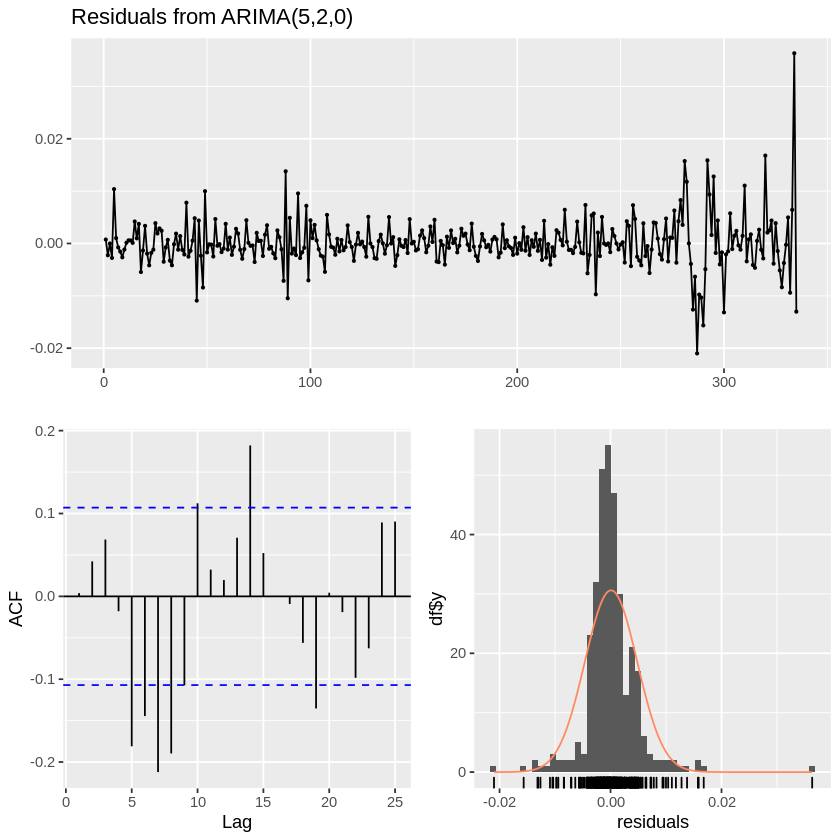

In [ ]:
checkresiduals(model1)

In [ ]:
res1 = accuracy( model1,x = unleaded_time_test)
res1

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,9.085557e-05,0.00471814,0.002986225,0.004463707,0.1507501,0.6734632,0.003985931
Test set,-1.464244e-01,0.18040173,0.146424360,-5.720891986,5.7208920,33.0221043,NA


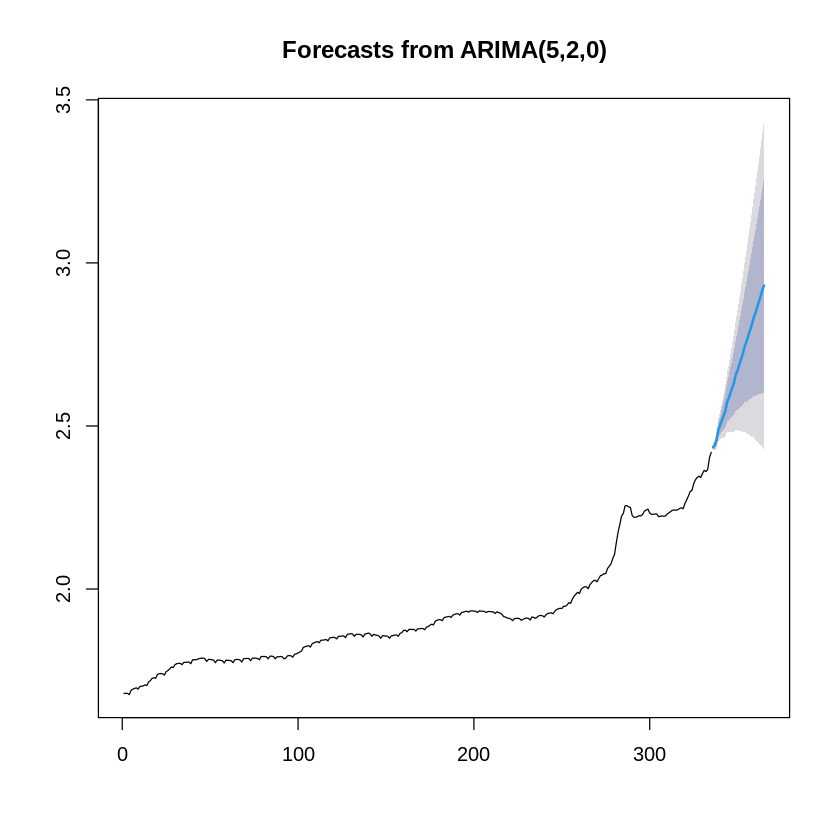

In [ ]:
plot(model1)

### With diff

In [ ]:
library(tseries)
kpss.test(unleaded_time_train)

Warning message in kpss.test(unleaded_time_train):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  unleaded_time_train
KPSS Level = 4.6946, Truncation lag parameter = 5, p-value = 0.01


In [ ]:
unleaded_diff <- diff(unleaded_time_train, differences=ndiffs(unleaded_time_train))
kpss.test(unleaded_diff)

Warning message in kpss.test(unleaded_diff):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  unleaded_diff
KPSS Level = 0.01709, Truncation lag parameter = 5, p-value = 0.1


Series: unleaded_diff 
ARIMA(5,0,0) with zero mean 

Coefficients:
          ar1      ar2      ar3      ar4     ar5
      -0.4741  -0.3555  -0.2105  -0.2434  0.4530
s.e.   0.0493   0.0554   0.0587   0.0572  0.0516

sigma^2 = 2.272e-05:  log likelihood = 1308.64
AIC=-2605.27   AICc=-2605.01   BIC=-2582.42


	Ljung-Box test

data:  Residuals from ARIMA(5,0,0) with zero mean
Q* = 57.093, df = 5, p-value = 4.838e-11

Model df: 5.   Total lags used: 10



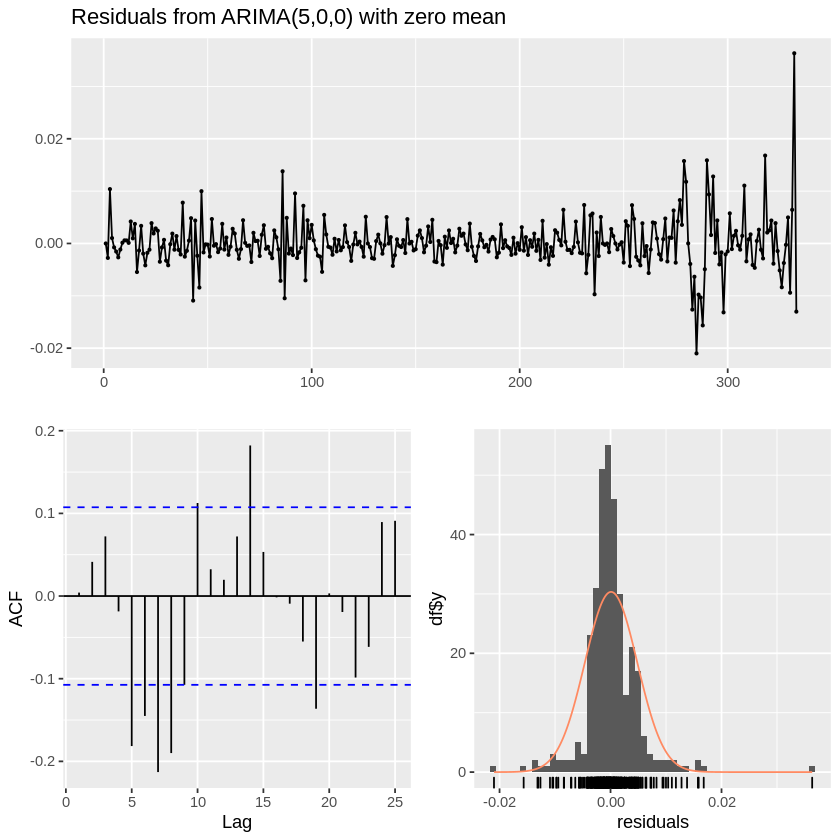

In [ ]:
fit_diff1 <-auto.arima(y=unleaded_diff)
fit_diff1
model_diff1 <- forecast(fit_diff1,h=nrow(unleaded_time_test))
checkresiduals(model_diff1)

In [ ]:
res_diff1 = accuracy( model_diff1,x = unleaded_time_test)
res_diff1

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,9.593784e-05,0.004730506,0.002995138,NaN,Inf,0.2899084,0.004160137
Test set,2.533875e+00,2.534614041,2.533874698,100.0015,100.0015,245.2613411,NA


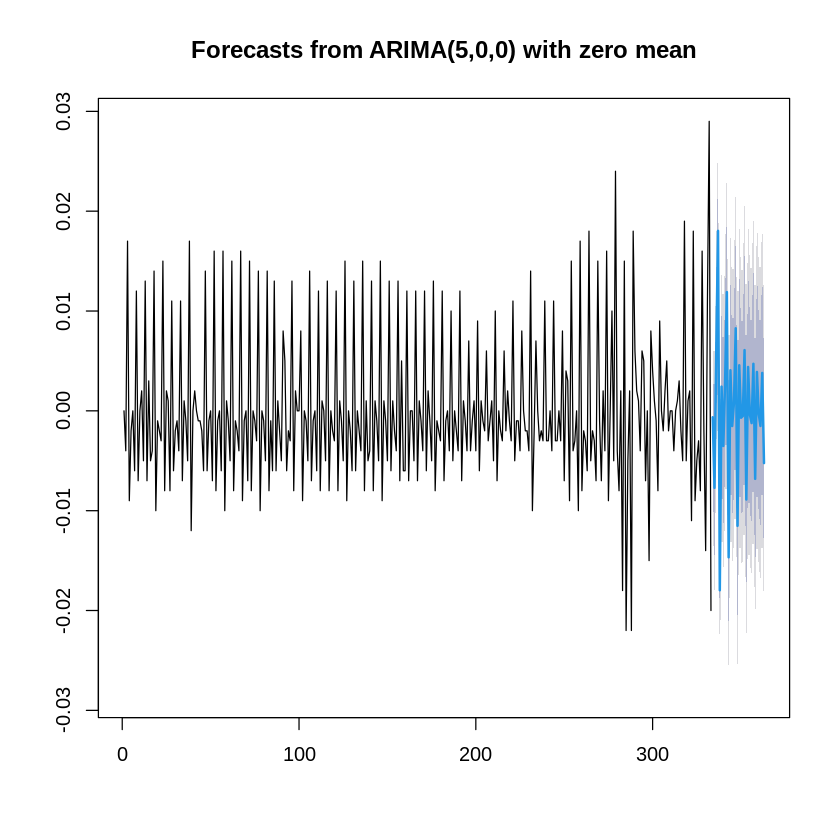

In [ ]:
plot(model_diff1)

## ARIMA With the Data

In [ ]:
fit2 <-auto.arima(y=unleaded_time_train,xreg=Data_time_train)
fit2

Series: unleaded_time_train 
Regression with ARIMA(5,1,4) errors 

Coefficients:
          ar1      ar2      ar3      ar4     ar5     ma1     ma2     ma3
      -0.1360  -0.1291  -0.1357  -0.1208  0.7506  0.5136  0.4451  0.6015
s.e.   0.0499   0.0484   0.0474   0.0466  0.0386  0.0744  0.0713  0.0625
         ma4   drift  BRNT.L.Close  CRUD.L.Volume  GOLD.Open  GOLD.Volume
      0.4515  0.0024        -1e-04          0e+00     -2e-04        0e+00
s.e.  0.0671  0.0009         4e-04          2e-04      1e-04        1e-04
      Importance.F1.score  Importance.F2.score  Importance.F3.score
                  -0.0030              -0.0017              -0.0029
s.e.               0.0031               0.0020               0.0027
      Importance.F4.score  Importance.F5.score
                   -2e-04               0.0012
s.e.                1e-03               0.0018

sigma^2 = 1.957e-05:  log likelihood = 1344.24
AIC=-2648.49   AICc=-2645.8   BIC=-2572.27

In [ ]:
model2 <- forecast(fit2,xreg=Data_time_test,h=nrow(unleaded_time_test))
#model2


	Ljung-Box test

data:  Residuals from Regression with ARIMA(5,1,4) errors
Q* = 22.112, df = 3, p-value = 6.182e-05

Model df: 9.   Total lags used: 12



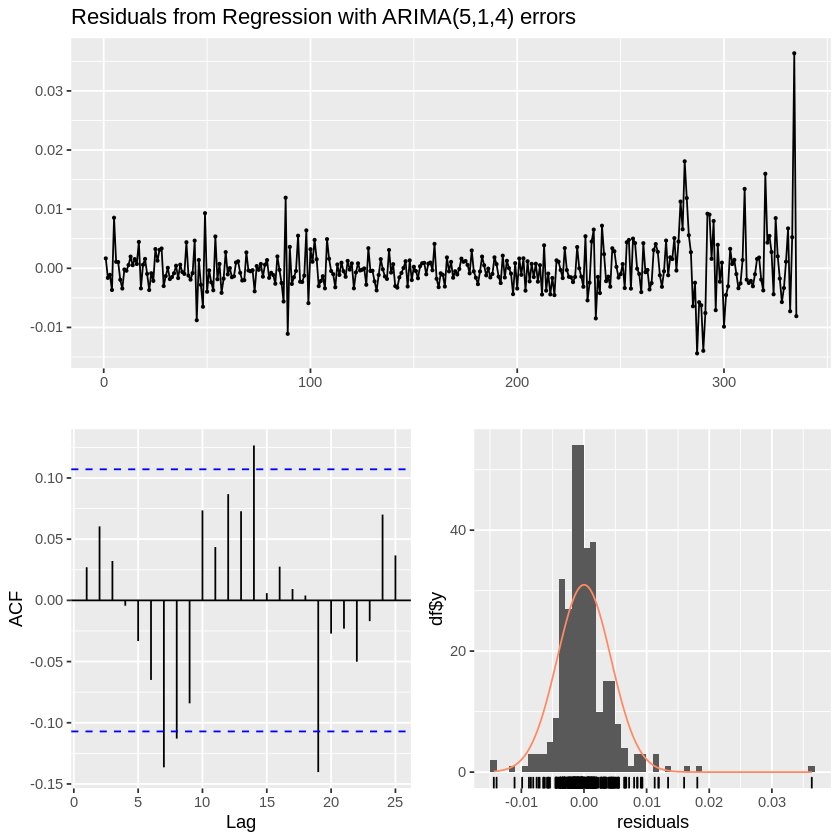

In [ ]:
checkresiduals(model2)

In [ ]:
res2 = accuracy( model2,x = unleaded_time_test)
res2

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.718803e-05,0.004289516,0.002780664,-0.001119169,0.1403071,0.6271044,0.02702993
Test set,1.411445e-02,0.034338064,0.030531923,0.530987810,1.2067447,6.8856600,NA


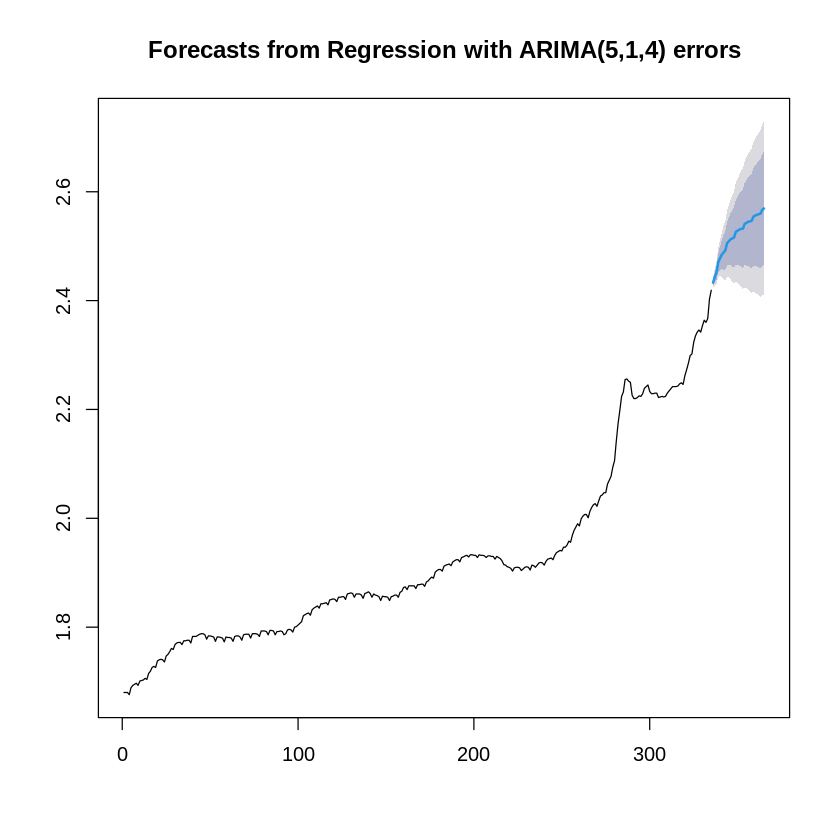

In [ ]:
plot(model2)

## ARIMA With the Data factors only

In [ ]:
colnames(Importance)

[1] "BRNT.L.Close"        "CRUD.L.Volume"       "GOLD.Open"          
[4] "GOLD.Volume"         "Importance.F1.score" "Importance.F2.score"
[7] "Importance.F3.score" "Importance.F4.score" "Importance.F5.score"

In [ ]:
Data_time_trainf = data.frame(Data_time_train)
Data_time_trainf[,'BRNT.L.Close']= NULL
Data_time_trainf[,'CRUD.L.Volume']= NULL
Data_time_trainf[,'GOLD.Open']= NULL
Data_time_trainf[,'GOLD.Volume']= NULL
Data_time_trainf = as.matrix(Data_time_trainf)

Data_time_testf = data.frame(Data_time_test)
Data_time_testf[,'BRNT.L.Close']= NULL
Data_time_testf[,'CRUD.L.Volume']= NULL
Data_time_testf[,'GOLD.Open']= NULL
Data_time_testf[,'GOLD.Volume']= NULL
Data_time_testf = as.matrix(Data_time_testf)

In [ ]:
fit3 <-auto.arima(y=unleaded_time_train,xreg=Data_time_trainf)
fit3

Series: unleaded_time_train 
Regression with ARIMA(5,1,4) errors 

Coefficients:
          ar1      ar2      ar3      ar4     ar5     ma1     ma2     ma3
      -0.1361  -0.1285  -0.1379  -0.1190  0.7500  0.5116  0.4384  0.6078
s.e.   0.0495   0.0479   0.0473   0.0467  0.0386  0.0735  0.0684  0.0609
         ma4   drift  Importance.F1.score  Importance.F2.score
      0.4464  0.0024              -0.0031              -0.0016
s.e.  0.0672  0.0009               0.0031               0.0019
      Importance.F3.score  Importance.F4.score  Importance.F5.score
                  -0.0023                1e-04               0.0012
s.e.               0.0026                1e-03               0.0018

sigma^2 = 1.943e-05:  log likelihood = 1343.29
AIC=-2654.58   AICc=-2652.86   BIC=-2593.6

In [ ]:
model3 <- forecast(fit3,xreg=Data_time_testf,h=nrow(unleaded_time_test))
#model2


	Ljung-Box test

data:  Residuals from Regression with ARIMA(5,1,4) errors
Q* = 21.126, df = 3, p-value = 9.912e-05

Model df: 9.   Total lags used: 12



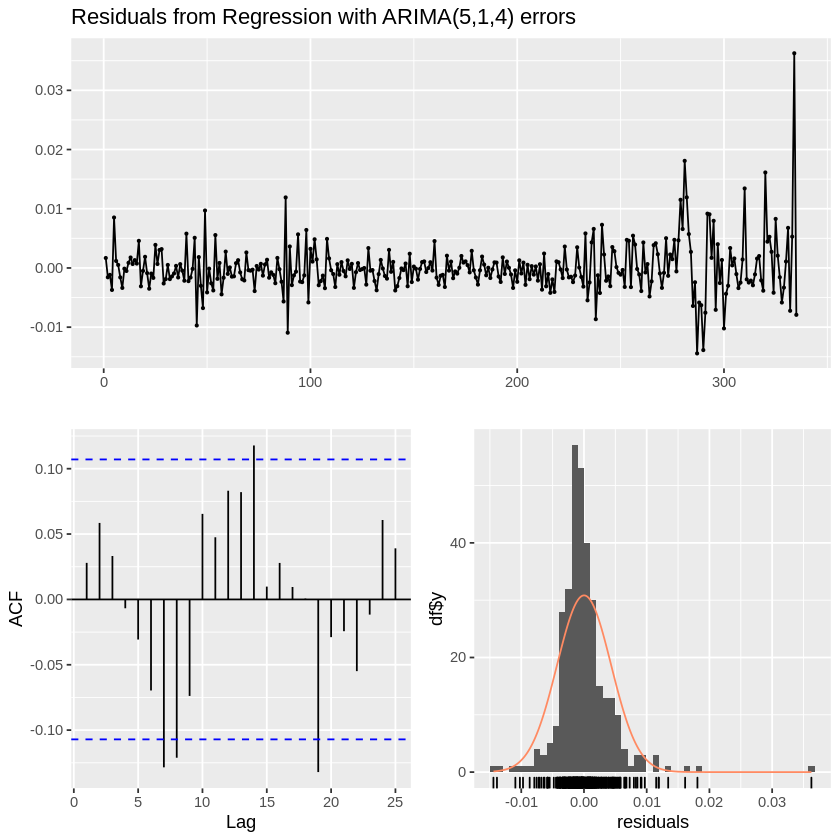

In [ ]:
checkresiduals(model3)

In [ ]:
res3 = accuracy( model3,x = unleaded_time_test)
res3

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.657834e-05,0.004301615,0.00276647,-0.001164048,0.1395839,0.6239034,0.02796224
Test set,1.367025e-02,0.034038165,0.03017078,0.513701755,1.1927488,6.8042147,NA


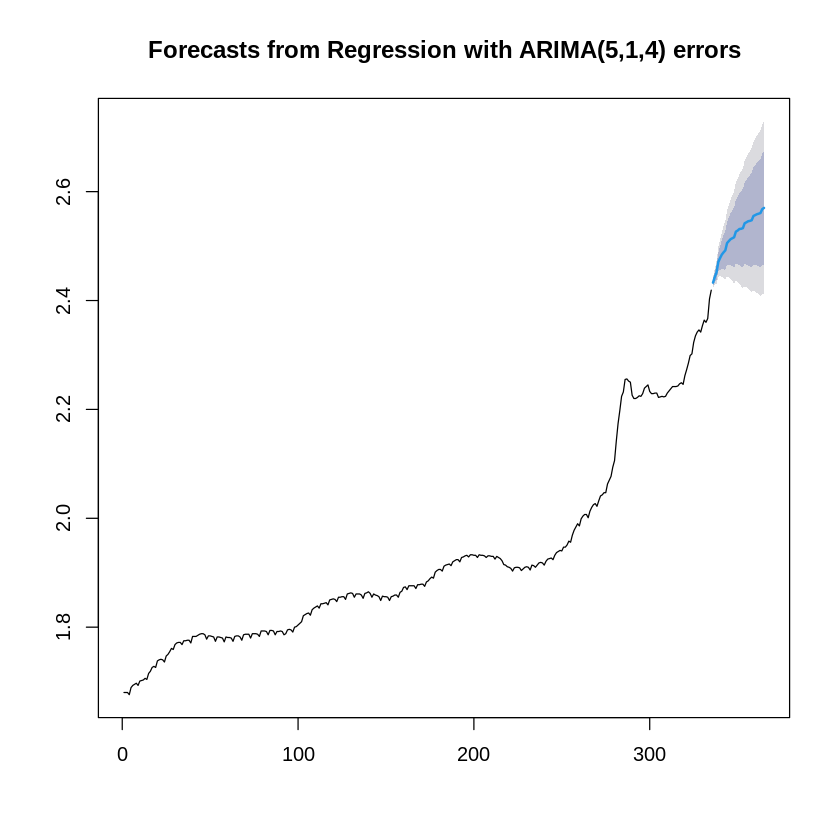

In [ ]:
plot(model3)

## ARIMA with raw data DEN GINETAI

In [ ]:
#Fixing the raw data
#Data_raw_train = as.matrix(Data[a:b,])
#3Data_raw_test = as.matrix(Data[((b+1):nrow(Data)),])
#head(Data_raw_train)

In [ ]:
#fit4 <-auto.arima(y=unleaded_time_train,xreg=Data_raw_train)
#fit4

ERROR: ignored

## Results

In [ ]:
print("Results wihout IRT/FA Data are:")
res1
print("Results wih IRT/FA Data are:")
res2
print("Results wih Data factors are:")
res3

[1] "Results wihout IRT/FA Data are:"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,9.085557e-05,0.00471814,0.002986225,0.004463707,0.1507501,0.6734632,0.003985931
Test set,-1.464244e-01,0.18040173,0.146424360,-5.720891986,5.7208920,33.0221043,NA


[1] "Results wih IRT/FA Data are:"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.718803e-05,0.004289516,0.002780664,-0.001119169,0.1403071,0.6271044,0.02702993
Test set,1.411445e-02,0.034338064,0.030531923,0.530987810,1.2067447,6.8856600,NA


[1] "Results wih Data factors are:"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.657834e-05,0.004301615,0.00276647,-0.001164048,0.1395839,0.6239034,0.02796224
Test set,1.367025e-02,0.034038165,0.03017078,0.513701755,1.1927488,6.8042147,NA
